In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.neighbors import NearestNeighbors

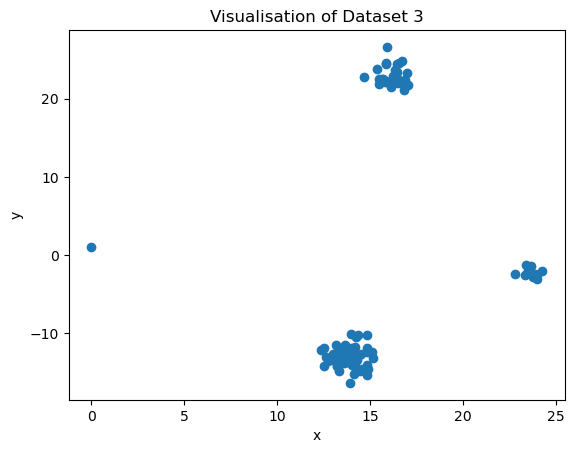

In [2]:
#dataset 3 visualisation
dataset2=np.loadtxt("train_data_2.csv",delimiter=",",dtype=float)
plt.scatter(dataset2[:,0],dataset2[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Visualisation of Dataset 3")
plt.show()

# Part 2d Elbow curve and DBSCAN with optimal eps and minpts=15

(0.0, 20.0)

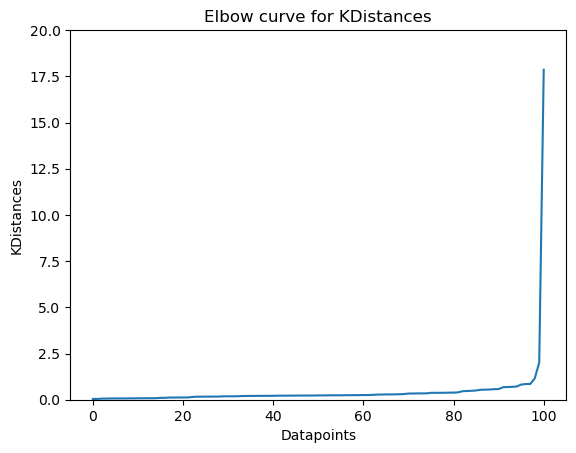

In [3]:
#elbow curve computation for dataset 3
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dataset2)
distances, indices = neighbors_fit.kneighbors(dataset2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylabel("KDistances")
plt.xlabel("Datapoints")
plt.title("Elbow curve for KDistances")
plt.plot(distances)
plt.ylim(0,20)

In [4]:
#function to obtain datapoints in the eps neighbourhood of the datapoint i
def neighb(i,eps):
    neighbours=[]
    for j in range(dataset2.shape[0]):
        if np.linalg.norm(dataset2[i]-dataset2[j]) <= eps:
            neighbours.append(j)
    return neighbours

In [5]:
#dbscan algorithm same as the Q2-dataset2
def dbscan(ds,Eps,Minpts):
    eps=Eps
    minpts=Minpts
    visited=np.zeros(ds.shape[0],dtype=bool)
    labels=np.zeros(ds.shape[0],dtype=int)
    lneigh=[]
    clusterid=0
    for i in range(ds.shape[0]):
        if not visited[i]:
            visited[i]=True
            neighbours=neighb(i,eps)
            lneigh.append(len(neighbours))
            if len(neighbours)< minpts:
                labels[i]=-1
            else:
                clusterid+=1
                labels[i]=clusterid
                j=0
                while j<len(neighbours):
                    idx=neighbours[j]
                    if not visited[idx]:
                        visited[idx]=True
                        new_neighbours=neighb(idx,eps)
                        if(len(new_neighbours)>=minpts):
                            neighbours=neighbours+new_neighbours
                    if labels[idx]==0:
                        labels[idx]=clusterid
                    j+=1
    print(np.max(labels))
    cmap = plt.get_cmap('viridis', len(np.unique(labels)))

    # Plot the data with a different color for each label
    for i, label in enumerate(np.unique(labels)):
        plt.scatter(ds[labels == label, 0], ds[labels == label, 1], color=cmap(i), label=f"Label {label}")
    plt.title("DBSCAN clustering for Dataset 3 with eps="+str(eps)+" minpts="+str(minpts))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

2


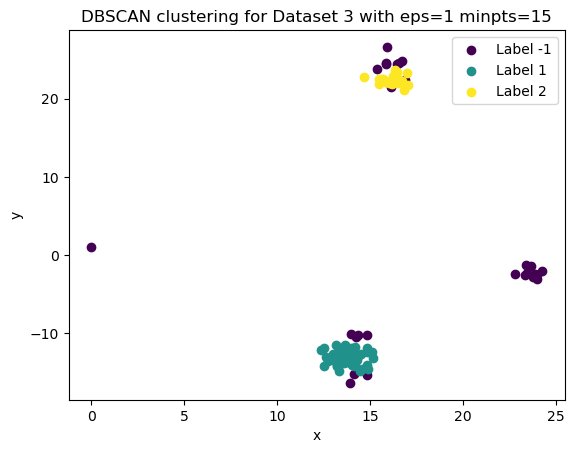

2


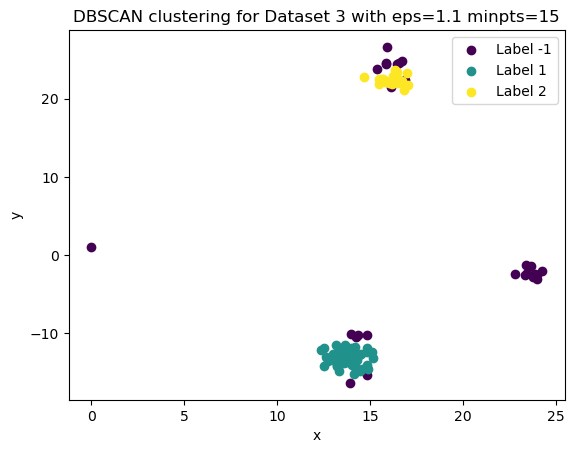

2


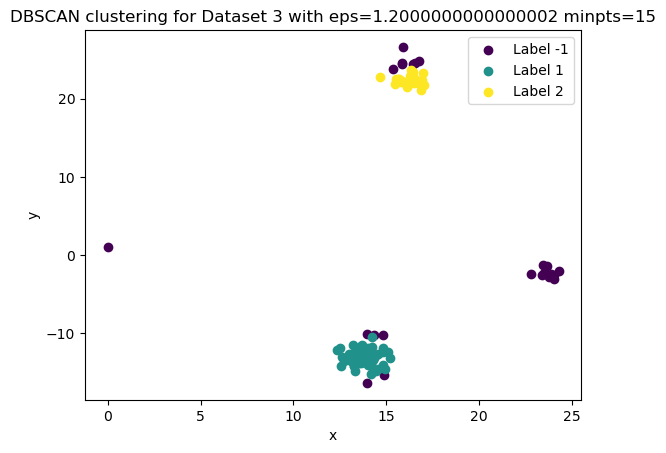

2


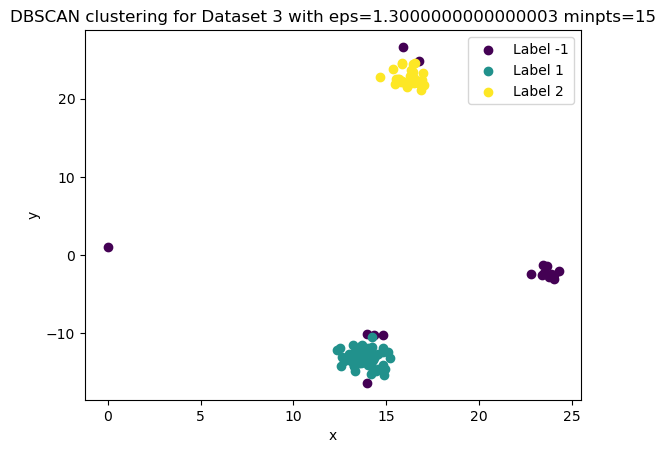

2


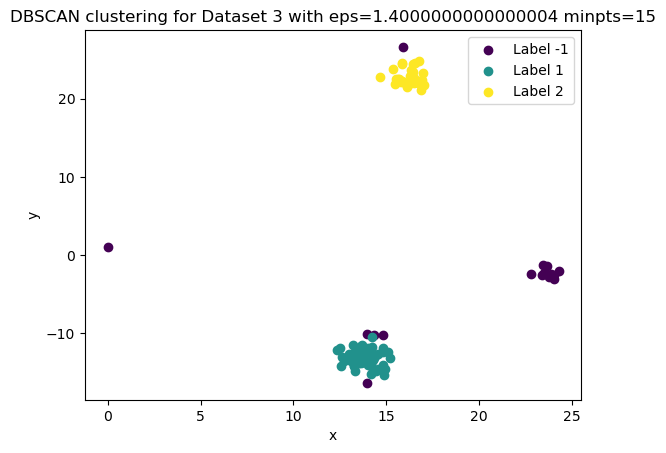

2


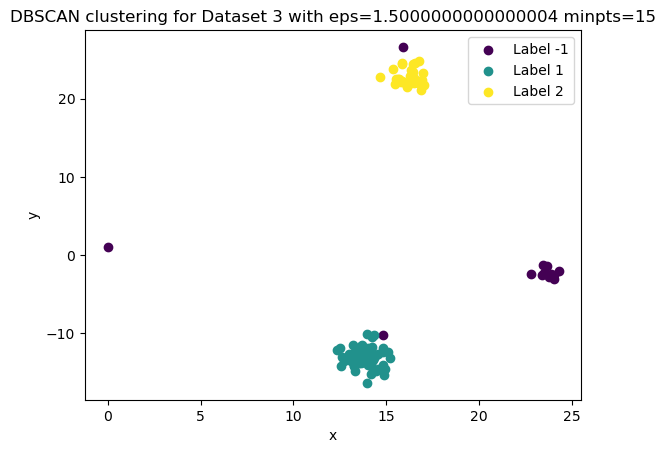

2


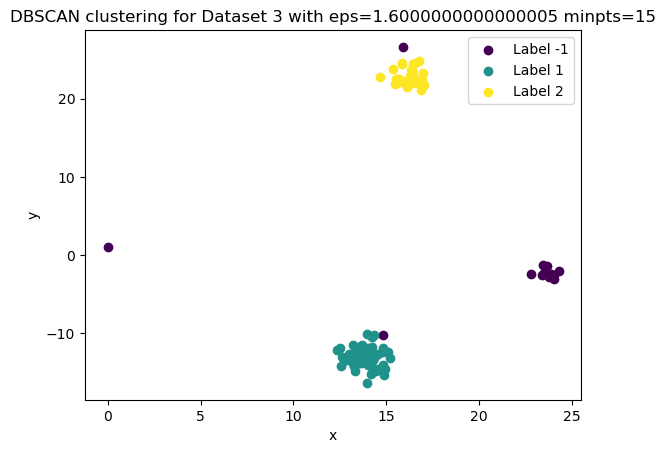

2


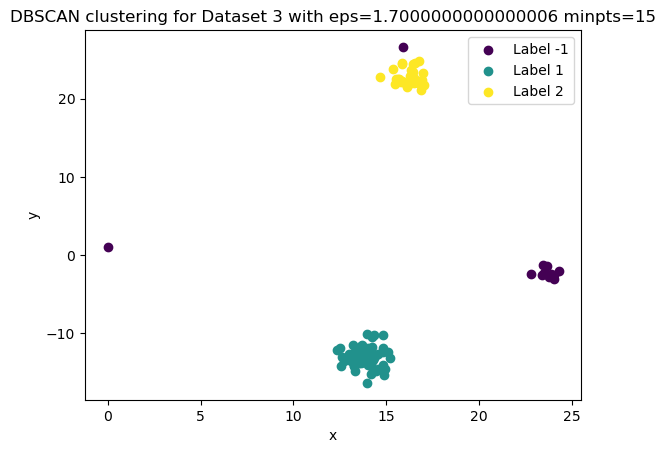

2


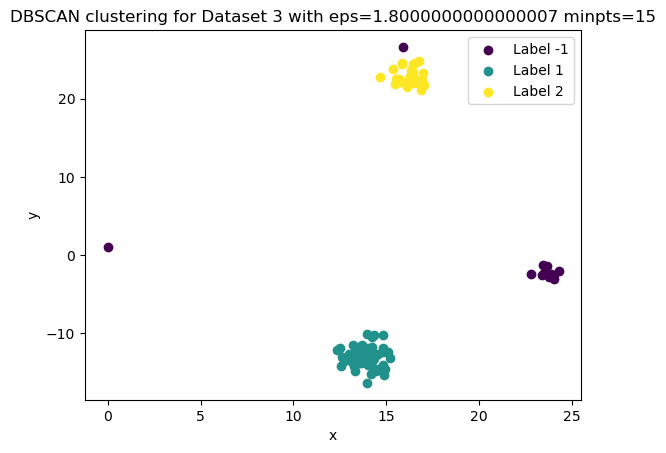

2


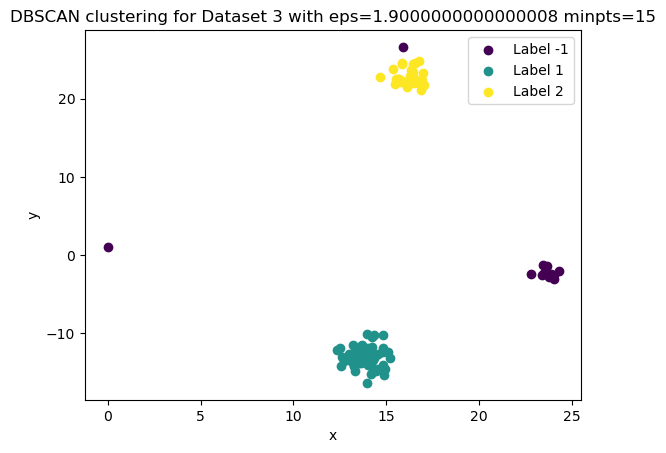

2


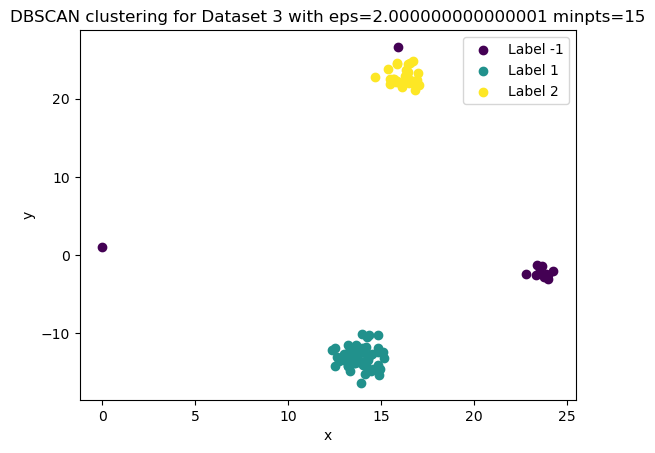

2


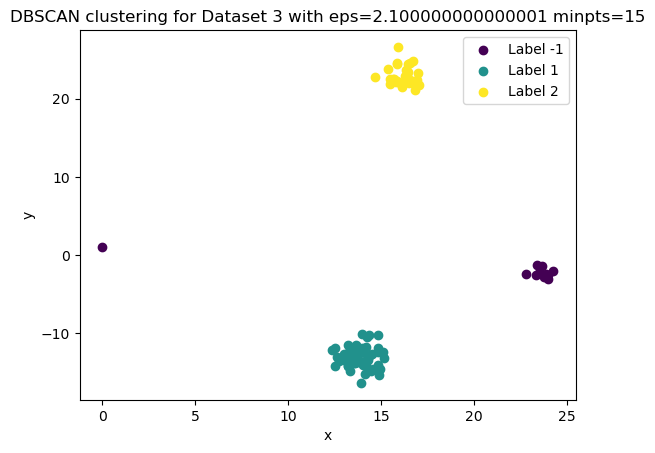

2


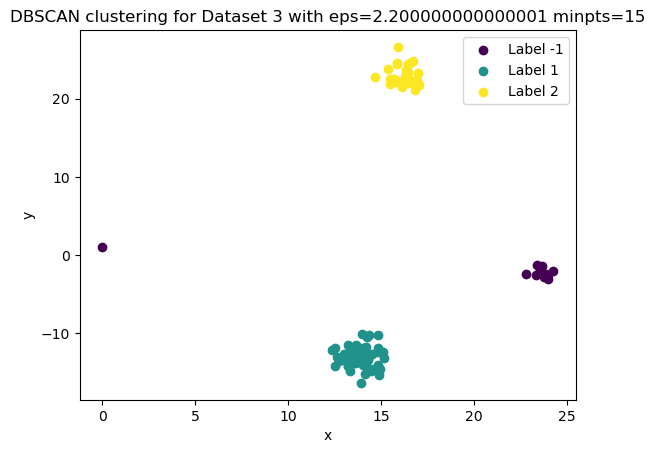

2


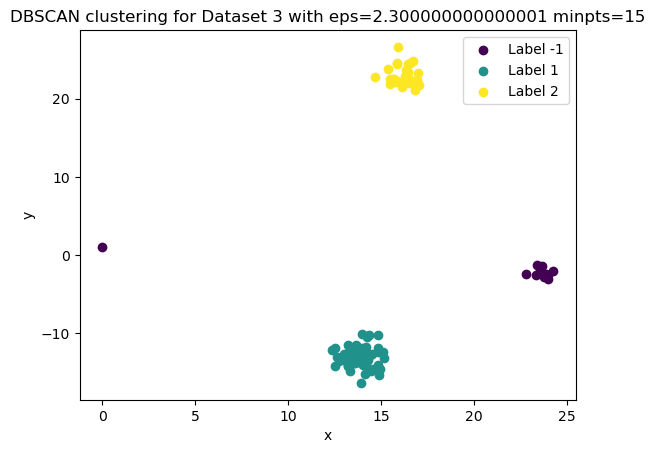

2


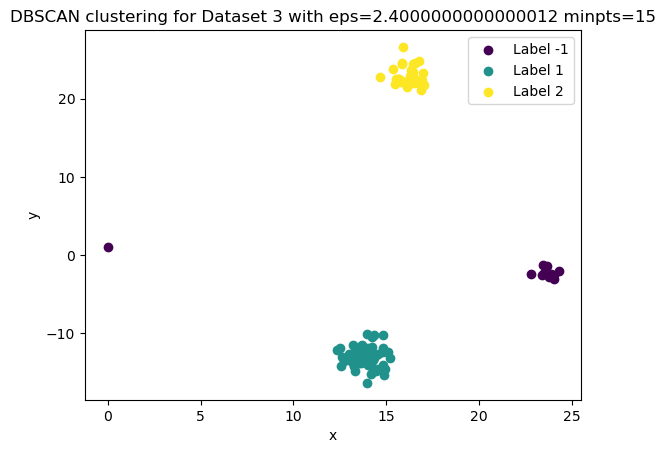

2


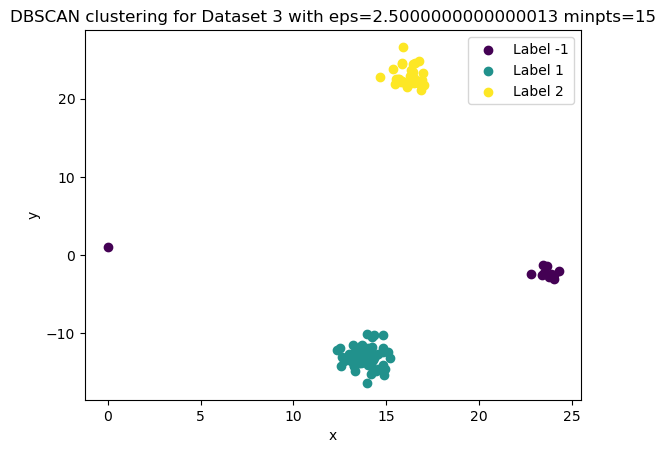

2


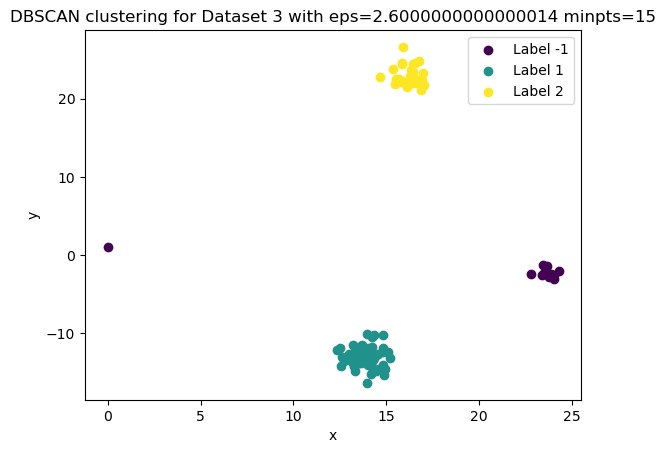

2


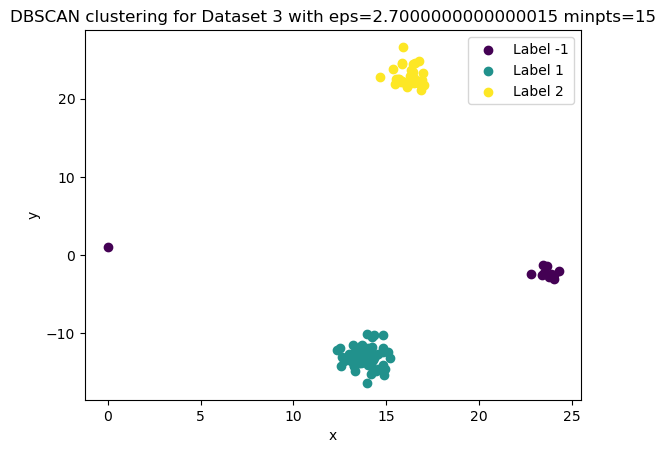

2


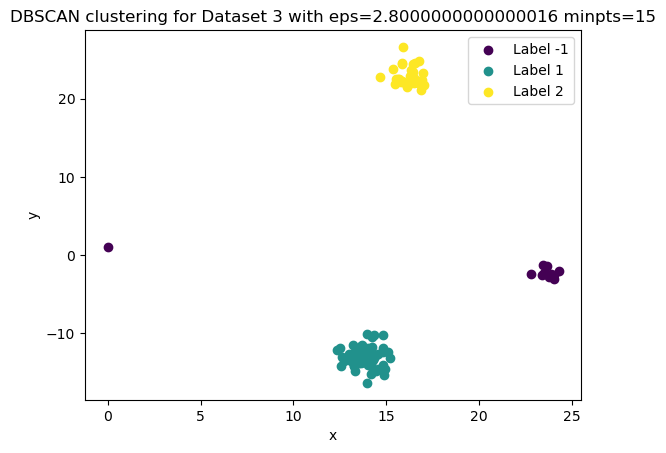

2


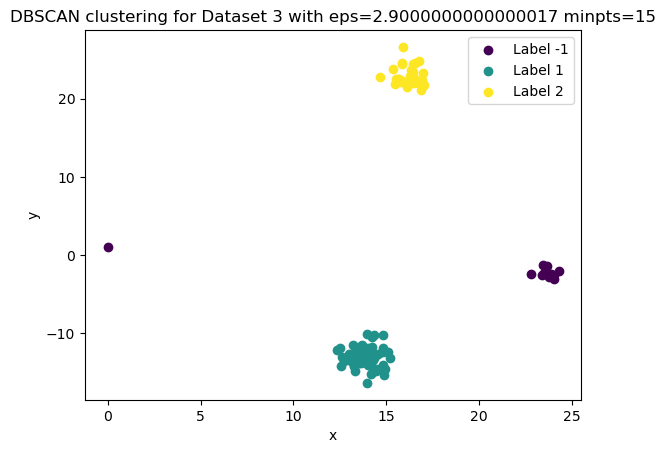

In [6]:
i=1
while i<3:
    dbscan(dataset2,i,15)
    i+=0.1

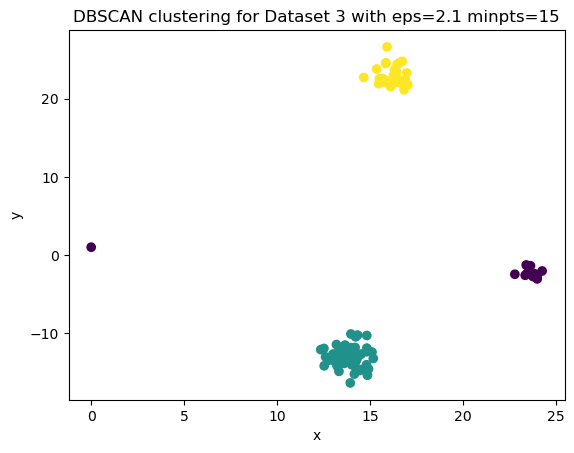

In [8]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=2.1,min_samples=15)
dbs.fit(dataset2)
plt.scatter(dataset2[:,0],dataset2[:,1], c=dbs.labels_, cmap='viridis')
plt.title("DBSCAN clustering for Dataset 3 with eps="+str(2.1)+" minpts="+str(15))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(0.0, 3.0)

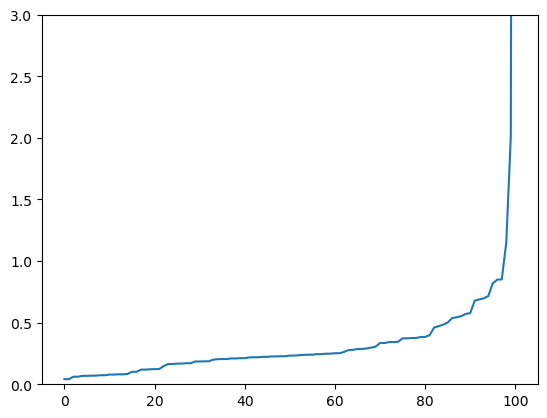

In [9]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(dataset2)
distances, indices = neighbors_fit.kneighbors(dataset2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(0,3)

3


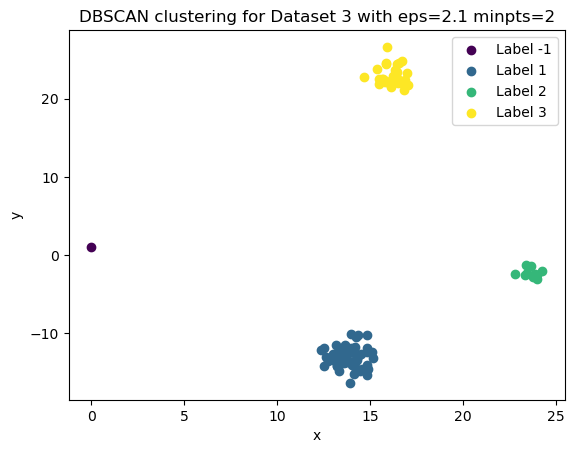

3


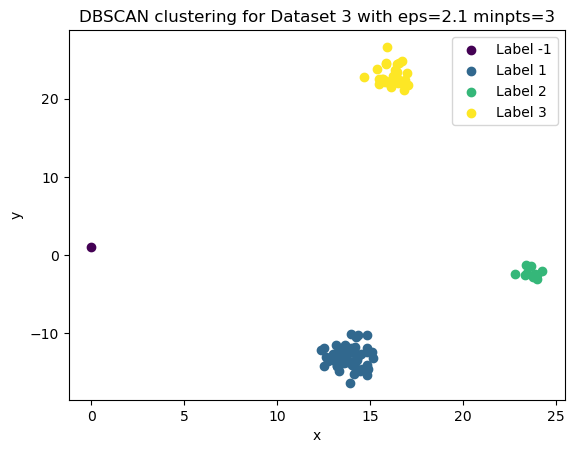

3


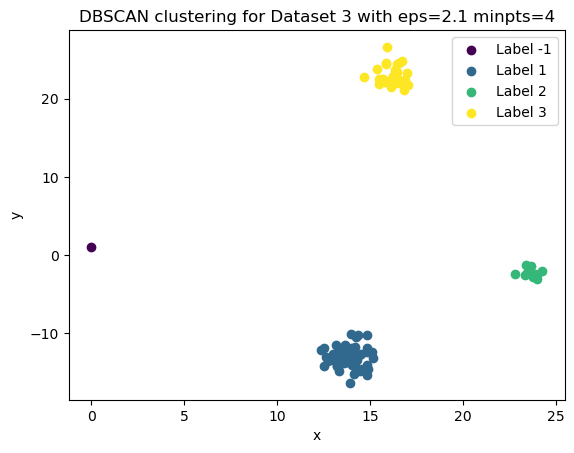

3


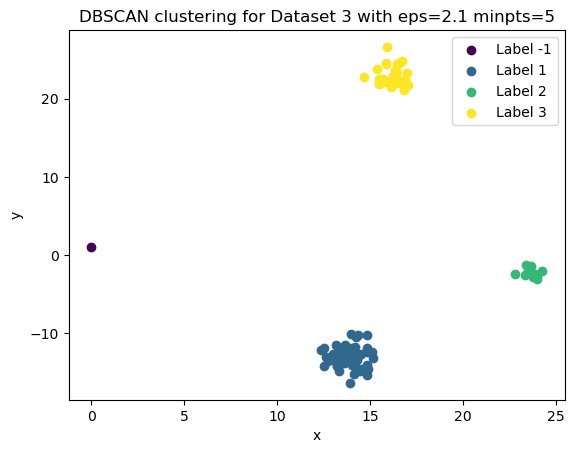

3


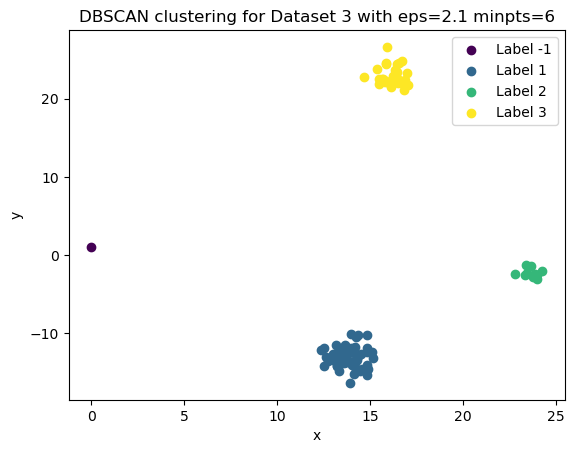

3


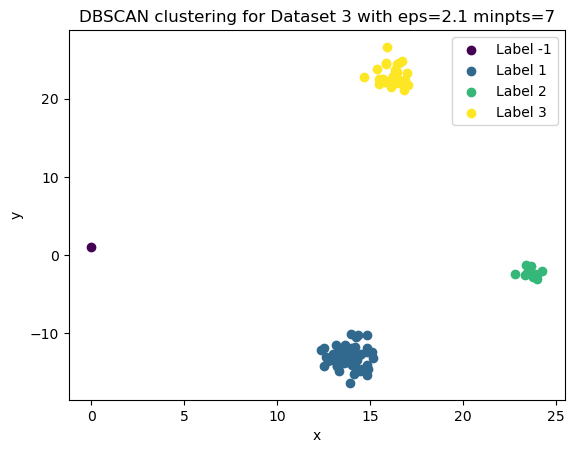

3


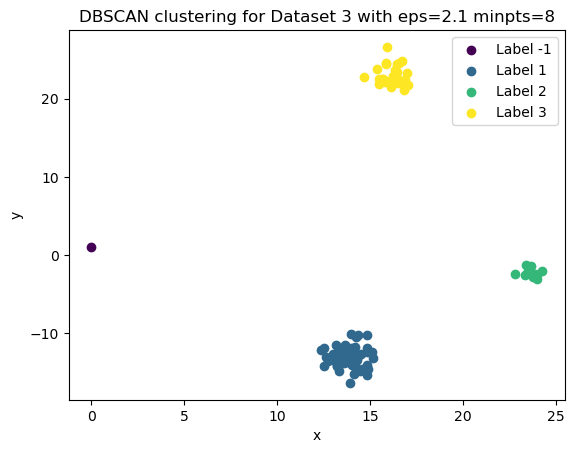

3


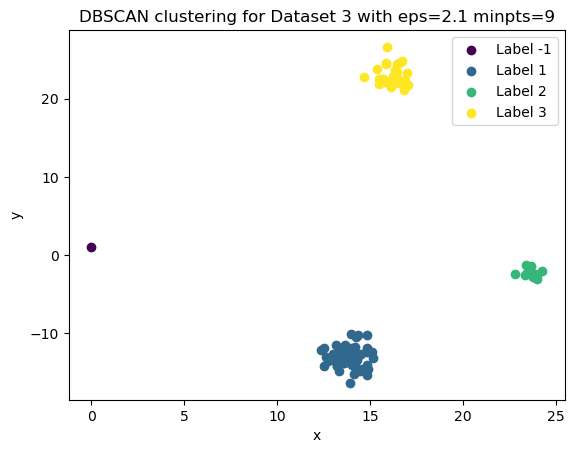

3


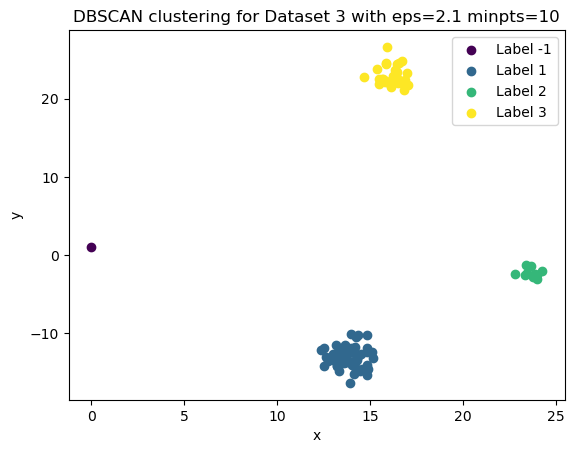

2


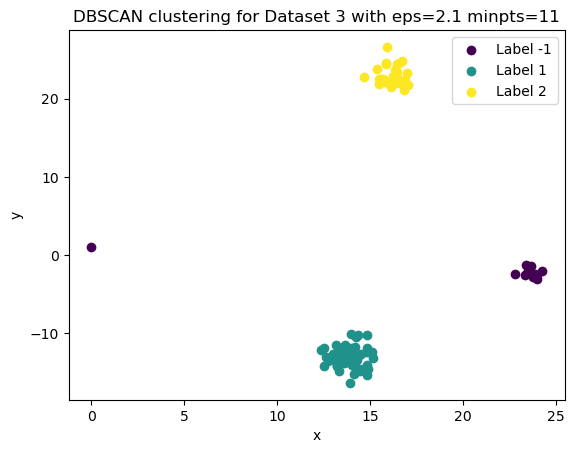

2


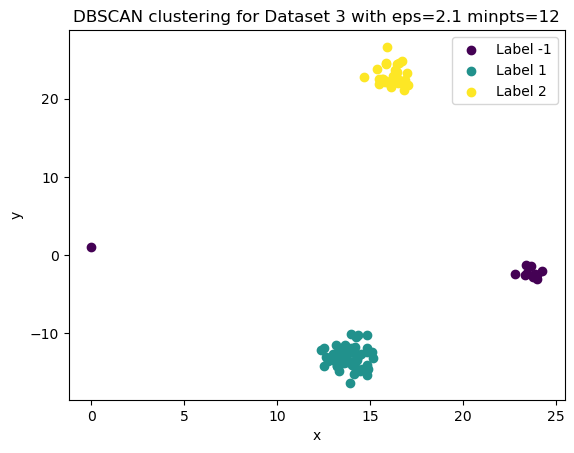

2


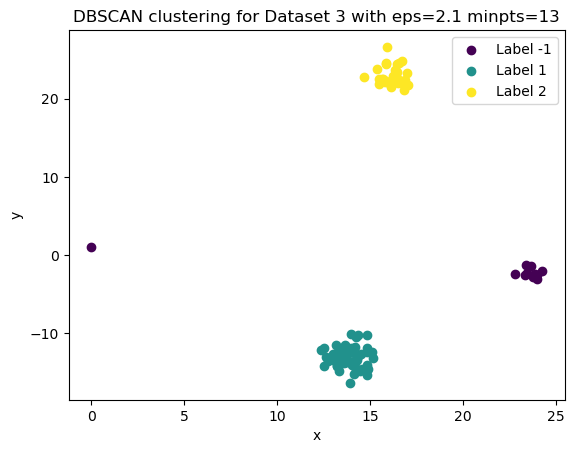

2


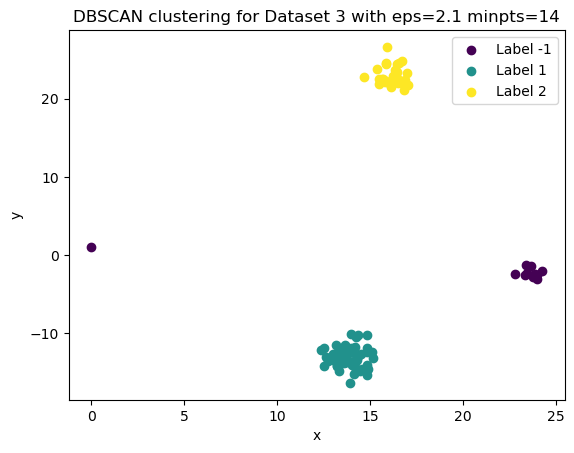

In [13]:
for i in range(2,15):
    dbscan(dataset2,2.1,i)

# Part 2e Kmeans with K=3 on dataset3

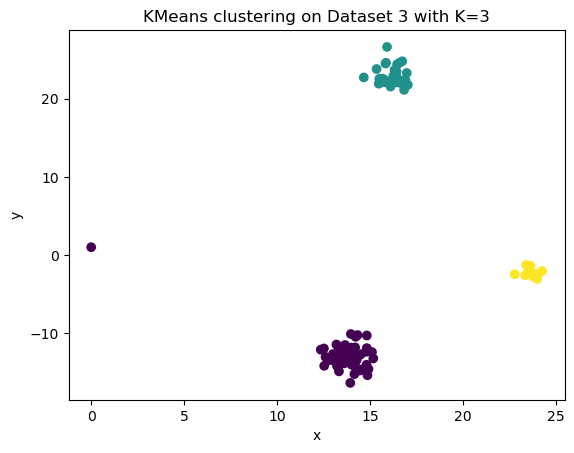

In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(dataset2)
labels = kmeans.labels_
plt.scatter(dataset2[:, 0], dataset2[:, 1], c=labels)
plt.title("KMeans clustering on Dataset 3 with K=3" )
plt.xlabel("x")
plt.ylabel("y")
plt.show()